# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.<br>

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Задача** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
<br>

Это позволит в будущем построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Ход исследования**<br>
Исследование пройдёт в три шага:

 - Обзор данных,
 - Предобработка данных,
 - Расчет дополнительных параметров и добавление новых столбцов, необходимых для исследования
 - Исследовательский анализ данных, в том числе зависимость цены от указанных ниже параметров:
   - общей площади;
   - жилой площади;
   - площади кухни;
   - количество комнат;
   - типа этажа, на котором расположена квартира (первый, последний, другой);
   - даты размещения (день недели, месяц, год).

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки pandas, matplotlib, pylab и seaborn для чтения файла и создания графиков.<br> 
Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`, указав в качестве разделителя знак табуляции \t. <br>
Путь к файлу:`/datasets/real_estate_data.csv`

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Познакомимся с данными: посмотрим основную информацию о датафрейме.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выборка значительная - более 20 000 строк.<br>
Данные четырех типов: целые числа, дробные (с плавающей точкой), текстовые, а также булевы значения.

Теперь посмотрим на саму таблицу: выведем первые 20 строчек датафрейма `data` на экран

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Исходные данные не идеальны: есть пропуски и, возможно, дубликаты. Хочется поправить названия и порядок столбцов, формат данных.<br>

Для наглядности построим общую гистограмму для всех столбцов таблицы:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

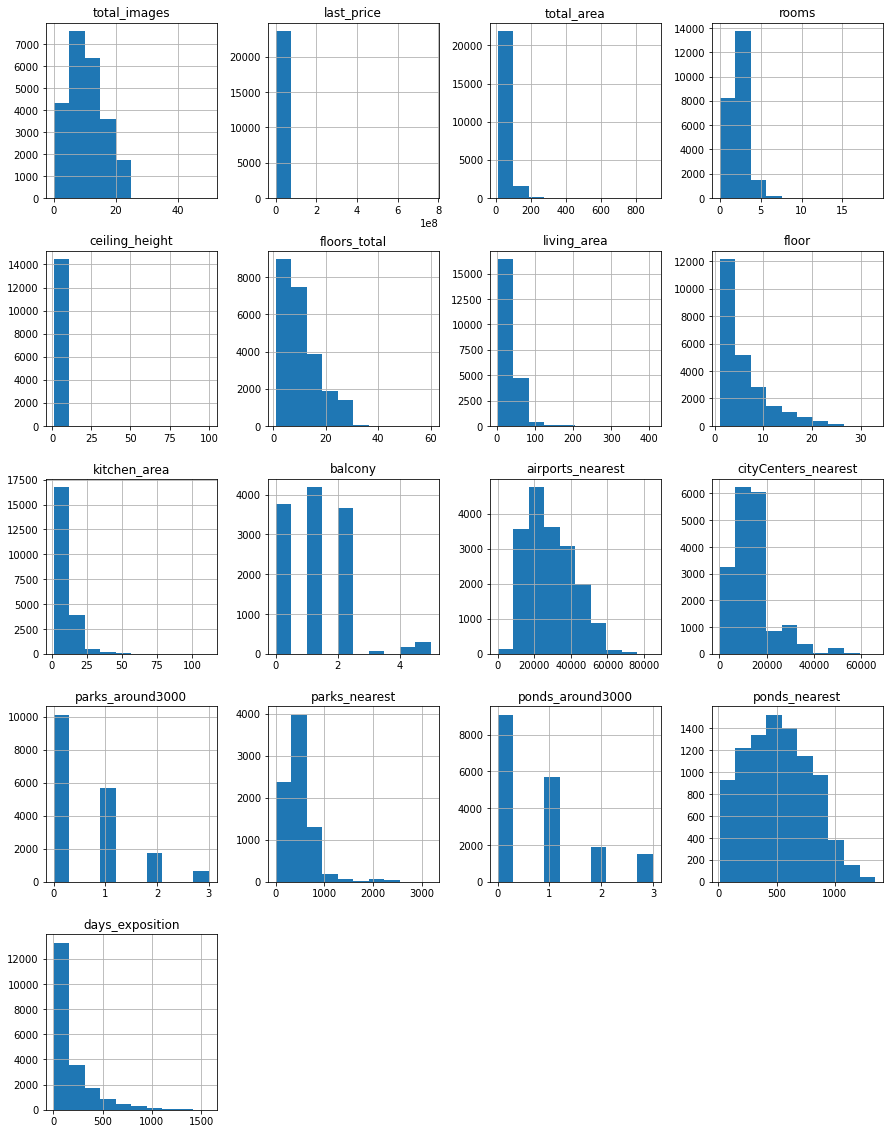

In [4]:
data.hist(figsize=(15, 20))

**Объединим выводы по 1 шагу:**<br>
 - Выборка значительная - более 20 000 строк.<br>
 - Данные четырех типов: целые числа, дробные (с плавающей точкой), текстовые, а также булевы значения.<br>
 - Исходные данные не идеальны: есть пропуски и, возможно, дубликаты. <br>
 - Гистограммы дают первое наглядное впечатление о данных: вроде всё на местах, но надо смотреть подробнее каждый столбец.

### Предобработка данных

In [5]:
data.duplicated().sum() 
# явных дубликатов в таблице нет 

0

Прежде чем заполнять пропущенные значения, упорядочим столбцы по смыслу данных и переменуем некоторые заголовки:

In [6]:
#посмотрим на список заголовков, которые есть сейчас:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [209]:
#переименуем на более подходящие:
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'floors_total',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
data.set_axis(cols, axis='columns', inplace=True)

In [8]:
# Убедимся, что столбцы переименованы
data.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'floors_total',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'town_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [212]:
# Теперь упорядочим столбцы по смыслу: от наиболее важных данных в объявлении к менее важным.
# Сначала город и характеристики квартиры, затем дополнительные сведения.
data = data[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'floors_total',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [10]:
data.head()
# Таблица стала выглядеть приятнее.

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


Начнем обработку со столбца с городами - одной из ключевых характеристик.

In [11]:
# Если нет города, то неизвестно, где находится квартира, такие объявления бесполезны.
# Удалим строки с неуказанным населенным пунктом и проверим результат.
data = data.dropna(subset=['town_name'])

data['town_name'].isna().sum()

0

In [12]:
# Для единообразия и исключения влияния регистра переведём все названия городов в нижний регистр.
data['town_name'] = data['town_name'].str.lower()

# Кроме того, есть традиционное для русского языка неудобство в связи с буквами 'е' и 'ё'.
# Слова 'поселок' и 'посёлок' надо привести к одному виду, а вот в населенных пунктах менять букву не будем, вдруг это критично.

data['town_name'] = data['town_name'].str.replace('поселок','посёлок')

data['town_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

In [13]:
# Слишком много названий, их трудно исследовать.
# Попробуем разбить населенные пункты на категории и проверим каждую:

def categorize_town(row):
    try:
        if 'деревня' in row:
            return 'деревня'
        elif 'село' in row:
            return 'село'
        elif 'посёлок' in row:
            return 'посёлок'
        else:
            return 'города и др.'
    except:
        return 'нет категории'

data['town_category'] = data['town_name'].apply(categorize_town)

# Начнем просмотр с категории, куда попали города и прочие населенные пункты, которые не удалось классифицировать:
data.loc[data['town_category'] == 'города и др.', 'town_name'].unique()

# Названия разные, видимых дубликатов нет.

array(['санкт-петербург', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'коммунар', 'колпино', 'гатчина', 'выборг', 'кронштадт', 'кировск',
       'садовое товарищество новая ропша', 'павловск', 'всеволожск',
       'волхов', 'кингисепп', 'приозерск', 'сестрорецк', 'сясьстрой',
       'сланцы', 'ивангород', 'мурино', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'кудрово', 'кириши', 'луга',
       'волосово', 'отрадное', 'тихвин', 'тосно', 'бокситогорск',
       'пикалёво', 'подпорожье', 'приморск', 'новая ладога',
       'лодейное поле', 'садовое товарищество рахья', 'светогорск',
       'любань', 'каменногорск',
       'садоводческое некоммерческое товарищество лесная поляна',
       'высоцк', 'садовое товарищество садко',
       'садовое товарищество приладожский'], dtype=object)

In [14]:
# Теперь деревни
data.loc[data['town_category'] == 'деревня', 'town_name'].unique()

array(['деревня кудрово', 'деревня фёдоровское',
       'деревня новое девяткино', 'деревня пикколово', 'деревня куттузи',
       'деревня заклинье', 'деревня старая', 'деревня лесколово',
       'деревня оржицы', 'деревня кальтино', 'деревня нурма',
       'деревня лопухинка', 'деревня кипень', 'деревня келози',
       'деревня вартемяги', 'деревня агалатово', 'деревня лаголово',
       'деревня белогорка', 'деревня большие колпаны', 'деревня горбунки',
       'деревня батово', 'деревня заневка', 'деревня иссад',
       'деревня мистолово', 'деревня разметелево', 'деревня пеники',
       'деревня пудомяги', 'деревня низино', 'деревня бегуницы',
       'деревня колтуши', 'деревня гостилицы', 'деревня малое карлино',
       'деревня аро', 'деревня малое верево', 'деревня извара',
       'деревня калитино', 'деревня чудской бор', 'деревня мины',
       'деревня коркино', 'деревня рабитицы', 'деревня кузьмолово',
       'деревня малые колпаны', 'деревня меньково',
       'деревня старые б

In [15]:
# Сёла
data.loc[data['town_category'] == 'село', 'town_name'].unique()

array(['красное село', 'село путилово', 'село павлово', 'село копорье',
       'село паша', 'село никольское', 'село русско-высоцкое',
       'село старая ладога', 'село рождествено', 'село шум'], dtype=object)

In [16]:
# и посёлки
data.loc[data['town_category'] == 'посёлок', 'town_name'].unique()

array(['посёлок шушары', 'городской посёлок янино-1', 'посёлок парголово',
       'посёлок мурино', 'посёлок городского типа красный бор',
       'посёлок металлострой', 'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'посёлок торковичи', 'посёлок первомайское', 'посёлок понтонный',
       'посёлок новый свет', 'посёлок романовка', 'посёлок бугры',
       'посёлок городского типа рощино', 'посёлок оредеж',
       'посёлок молодёжное', 'посёлок победа',
       'посёлок городского типа синявино', 'посёлок стрельна',
       'посёлок александровская', 'посёлок терволово',
       'посёлок городского типа советский', 'посёлок петровское',
       'посёлок городского типа токсово', 'посёлок сельцо',
       'посёлок городского типа вырица', 'посёлок тельмана',
       'посёлок севастьяново', 'городской посёло

В общем, всё равно непонятно, названий много и они могут дублироваться в разных категориях.<br>
Принимаем волевое решение избавиться от описания населенного пункта вообще (уберем слова "посёлок", "посёлок городского типа", "деревня" и т.п.), оставим только само название населенного пункта. 

In [17]:
def town_short(text):
    dict =['деревня ', 
           'коттеджный посёлок ', 'садовое товарищество ', 
           'посёлок городского типа ', 'посёлок при железнодорожной станции ', 'поёелок станции ', 
           'городской посёлок ', 'садоводческое некоммерческое товарищество '
           'посёлок городского типа ', 'посёлок имени', 'посёлок ', 'село ']
    for i in dict:
        text = text.replace(i, '')  
    return text   

# создадим столбец с укороченными названиями
data['town_name_short'] = data['town_name'].apply(town_short)

data['town_name_short'].unique().tolist()

['санкт-петербург',
 'шушары',
 'янино-1',
 'парголово',
 'мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'кудрово',
 'коммунар',
 'колпино',
 'красный бор',
 'гатчина',
 'фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'новое девяткино',
 'металлострой',
 'лебяжье',
 'сиверский',
 'молодцово',
 'кузьмоловский',
 'новая ропша',
 'павловск',
 'пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'куттузи',
 'аннино',
 'ефимовский',
 'плодовое',
 'заклинье',
 'торковичи',
 'первомайское',
 'красное село',
 'понтонный',
 'сясьстрой',
 'старая',
 'лесколово',
 'новый свет',
 'сланцы',
 'путилово',
 'ивангород',
 'шлиссельбург',
 'никольское',
 'зеленогорск',
 'сосновый бор',
 'оржицы',
 'кальтино',
 'романовка',
 'бугры',
 'рощино',
 'кириши',
 'луга',
 'волосово',
 'отрадное',
 'павлово',
 'оредеж',
 'копорье',
 'молодёжное',
 'тихвин',
 'победа',
 'нурма',
 'синявино',
 'тосно',
 'стрельна',
 'бокситогорск',
 'александровская',
 'лопухинка'

In [18]:
# Снова проверим явные дубликаты
data.duplicated().sum() 

0

Теперь названия населенных пунктов в относительном порядке.<br>
Исключены сбивающие с толку категории населенных пунктов, а также проблемы с "е" и "ё". <br>

Для поиска по уникальному названию населенного пункта можно пользоваться новым столбцом 'town_name_short'.

Отметим, что ошибка с применением буквы "ё", разный регистр букв и разное написание типов посёлков - типичный пример человеческого фактора при заполнении формы.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         12137 non-null  float64
 7   floor                       23650 non-null  int64  
 8   floors_total                23565 non-null  float64
 9   is_apartment                2760 non-null   object 
 10  is_studio                   23650 non-null  bool   
 11  is_open_plan                23650 non-null  bool   
 12  total_images                23650 non-null  int64  
 13  last_price                  236

Обработаем пропуски в остальных столбцах, заодно исправим типы данных.      

In [192]:
# Заменим пустые значения жилой площади и площади кухни
living_ratio = data['living_area_m2'].mean() / data['total_area_m2'].mean()
kitchen_ratio = data['kitchen_area_m2'].mean() / data['total_area_m2'].mean()
data['living_area_m2'].fillna(living_ratio * data['total_area_m2'], inplace=True)
data['kitchen_area_m2'].fillna(kitchen_ratio * data['total_area_m2'], inplace=True)

# Пустые значения высоты потолков поменяем на медианное значение по всему датасету
data['ceiling_height_m'] = data.groupby(['town_name', 'floors_total'])['ceiling_height_m'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height_m'].fillna(data['ceiling_height_m'].median(), inplace=True)

# Приведем в целочисленный тип количество балконов и заменим пропущенные значения на 0
data['number_of_balconies'] = data['number_of_balconies'].fillna(value=0).astype(int)

# Пропуски в столбце 'floors_total' 
# назначим общее количество этажей исходя из количества этажей в домах - минимальное из 5, 9, 16 или 24 этажей.
# (в зависимости от того, на каком этаже объект: если его этаж не больше 5, то 5, и так далее). 
# Также переведем данные этого столбца в целочисленный тип.
for i in [5, 9, 16, 24]:
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= i), 'floors_total'] = i

data[['floors_total']] = data[['floors_total']].astype(int)
    
# Заменим пропущенные значения апартаментов на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

# Дату публикации сделаем в формате даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Приведем в целочисленный вид с данные о парках и прудах и заменим пропущенные значения на 0
data['parks_numbers_within_3km'] = data['parks_numbers_within_3km'].fillna(value=0).astype(int)

data['ponds_number_within_3km'] = data['ponds_number_within_3km'].fillna(value=0).astype(int)

# Снова проверим количество пропущенных значений
display(data.head())
data.info()
data.isna().sum()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition,center_km,sm_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.028,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,18.603,82920
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,13.933,92785
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,90.785766,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,6.800,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.098,100000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23699 non-null  int64         
 1   last_price                  23699 non-null  float32       
 2   total_area_m2               23699 non-null  float64       
 3   first_day_exposition        23699 non-null  datetime64[ns]
 4   number_of_rooms             23699 non-null  int64         
 5   ceiling_height_m            23699 non-null  float64       
 6   floors_total                23699 non-null  int64         
 7   living_area_m2              23699 non-null  float64       
 8   floor                       23699 non-null  int64         
 9   is_apartment                23699 non-null  bool          
 10  is_studio                   23699 non-null  bool          
 11  is_open_plan                23699 non-null  bool      

total_images                      0
last_price                        0
total_area_m2                     0
first_day_exposition              0
number_of_rooms                   0
ceiling_height_m                  0
floors_total                      0
living_area_m2                    0
floor                             0
is_apartment                      0
is_studio                         0
is_open_plan                      0
kitchen_area_m2                   0
number_of_balconies               0
town_name                        49
nearest_airport_distance_m     5542
city_center_distance_m         5519
parks_numbers_within_3km          0
nearest_park_distance_m       15620
ponds_number_within_3km           0
nearest_pond_distance_m       14589
days_exposition                3181
center_km                         0
sm_price                          0
dtype: int64

Рассмотрим внимательнее данные по длительности продаж. 

In [22]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Выберем строки, в которых отсутствует значение days_exposition и построим гистограмму, 
распределяющую количество объявлений по дате размещения:

Text(0, 0.5, 'Количество объявлений')

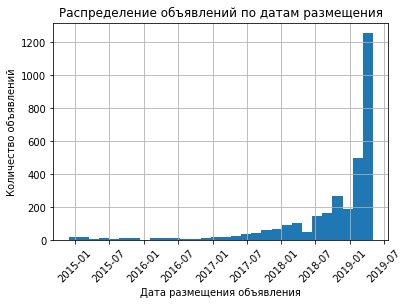

In [102]:
# Сделаем срез объявлений с пропусками в days_exposition:
days_na = data.query('days_exposition.isna()')

# Построим гистограмму по дате размещения объявлений:
days_na['first_day_exposition'].hist(bins=30).set(xlabel='Дата размещения объявления',
                              ylabel = 'Количество объявлений')
pl.xticks(rotation = 45)
pl.title("Распределение объявлений по датам размещения")
pl.xlabel("Дата размещения объявления")
pl.ylabel("Количество объявлений")

Получается следующее: чем больше дата, тем больше в базе данных объявлений с пропусками в days_exposition.<br>
Видимо, эти объявления не были закрыты (квартиры не проданы либо не сняты с продажи).<br>

**Почему мы всё это сделали:** <br>

Типы данных мы меняли, так как они бывают разные, это не всегда подходит для анализа.

Пропуски тоже мешают анализу.
Причины, которые могли привести к пропускам в данных:

Причина 1 - если пользователь не заполнил форму до конца, не дал сведений о себе (контактный номер, фамилию и т.п.),<br>
Причина 2 - если произошла техническая ошибка в работе системы сбора информации (например, при выгрузке данных из разных систем некорректный формат приводит к невыполнению кода).<br>
Причина 3 - если пропуск был оставлен умышленно в расчете на автозаполнение спецсимволами.

Можно еще заменить тип данных с float64 на float32 и с int64 на int32 для экономии памяти:

In [195]:
# До изменений объем выделяемой памяти доходил до 5 MB при добавлени новых столбцов.

# Поменяем целочисленный тип с int64 на int32  
data['area_ratio'] = data['area_ratio'].astype('int32')
data['kitchen_ratio'] = data['kitchen_ratio'].astype('int32')
data['number_of_rooms'] = data['number_of_rooms'].astype('int32')
data['number_of_balconies'] = data['number_of_balconies'].astype('int32')
data['floor'] = data['floor'].astype('int32')
data['floors_total'] = data['floors_total'].astype('int32')
data['total_images'] = data['total_images'].astype('int32')
data['sm_price'] = data['sm_price'].astype('int32')
data['weekday'] = data['weekday'].astype('int32')
data['month'] = data['month'].astype('int32')
data['parks_numbers_within_3km'] = data['parks_numbers_within_3km'].astype('int32')
data['ponds_number_within_3km'] = data['ponds_number_within_3km'].astype('int32')

# Теперь заменим float64 на float32
data['total_area_m2'] = data['total_area_m2'].astype('float32')
data['living_area_m2'] = data['living_area_m2'].astype('float32')
data['kitchen_area_m2'] = data['kitchen_area_m2'].astype('float32')
data['ceiling_height_m'] = data['ceiling_height_m'].astype('float32')
data['last_price'] = data['last_price'].astype('float32')
data['days_exposition'] = data['days_exposition'].astype('float32')
data['city_center_distance_m'] = data['city_center_distance_m'].astype('float32')
data['city_center_distance_km'] = data['city_center_distance_km'].astype('float32')
data['center_km'] = data['center_km'].astype('float32')
data['nearest_airport_distance_m'] = data['nearest_airport_distance_m'].astype('float32')
data['nearest_park_distance_m'] = data['nearest_park_distance_m'].astype('float32')
data['nearest_pond_distance_m'] = data['nearest_pond_distance_m'].astype('float32')

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23699 non-null  int32         
 1   last_price                  23699 non-null  float32       
 2   total_area_m2               23699 non-null  float32       
 3   first_day_exposition        23699 non-null  datetime64[ns]
 4   number_of_rooms             23699 non-null  int32         
 5   ceiling_height_m            23699 non-null  float32       
 6   floors_total                23699 non-null  int32         
 7   living_area_m2              23699 non-null  float32       
 8   floor                       23699 non-null  int32         
 9   is_apartment                23699 non-null  bool          
 10  is_studio                   23699 non-null  bool          
 11  is_open_plan                23699 non-null  bool      

Заменив тип данных с float64 на float32 и с int64 на int32 нам удалось сократить memory usage с 5 (после добавления всех новых столбцов) до 3.2 MB

**Теперь исследуем возможные аномальные значения в некоторых столбцах.**<br>

**Столбец 'total_area_m2'**

0    108.000000
1     40.400002
2     56.000000
3    159.000000
4    100.000000
5     30.400000
6     37.299999
Name: total_area_m2, dtype: float32

count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area_m2, dtype: float64

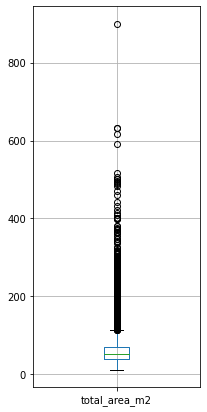

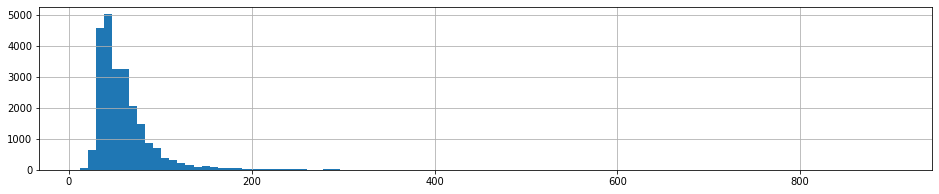

In [129]:
# Для анализа каждого столбца удобно будет написать функцию и видеть сразу данные о столбце и графики к нему:
def descr_numeric(target_column):
    display(data[target_column].head(7), data[target_column].describe())
    data.boxplot(column=target_column, figsize=(3,7)); 
    plt.show()
    data[target_column].hist(figsize=(16,3), bins=100)
    
descr_numeric('total_area_m2')

Text(0, 0.5, 'Количество объявлений')

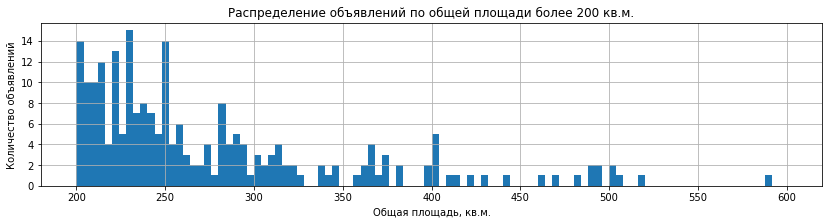

In [85]:
# на первый взгляд корректно, посмотрим как распределяются данные по объявлениям с площадью более 200 кв.м.
data.hist('total_area_m2', bins=100, figsize=(14,3), range=(200, 600))
pl.title("Распределение объявлений по общей площади более 200 кв.м.")
pl.xlabel("Общая площадь, кв.м.")
pl.ylabel("Количество объявлений")

Разброс равномерный, оставим столбец без изменений.

**Столбец 'number_of_rooms'**

0    3
1    1
2    2
3    3
4    2
5    1
6    1
Name: number_of_rooms, dtype: int32

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: number_of_rooms, dtype: float64

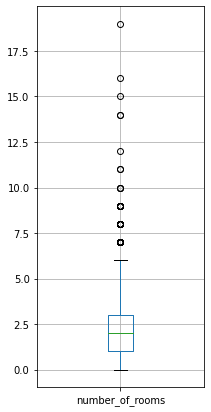

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: number_of_rooms, dtype: int64

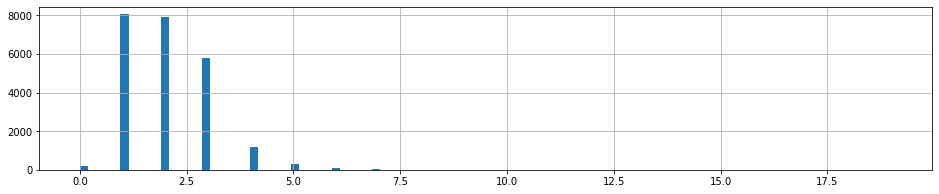

In [130]:
descr_numeric('number_of_rooms')
data['number_of_rooms'].value_counts()

In [131]:
# Рассчитаем средние значения площади для 1,2,3,4 комнатных квартир

for n in range(1,5):
    display(f'{n} комнатная квартира:', data.query('number_of_rooms == @n')['total_area_m2'].describe())
    display()

'1 комнатная квартира:'

count    8047.000000
mean       37.644669
std         9.338358
min        12.000000
25%        32.500000
50%        36.560001
75%        41.000000
max       494.100006
Name: total_area_m2, dtype: float64

'2 комнатная квартира:'

count    7940.000000
mean       55.855091
std        13.196341
min        20.000000
25%        46.000000
50%        53.000000
75%        62.000000
max       196.000000
Name: total_area_m2, dtype: float64

'3 комнатная квартира:'

count    5814.000000
mean       77.764580
std        23.268744
min        40.099998
25%        62.000000
50%        73.000000
75%        87.000000
max       363.100006
Name: total_area_m2, dtype: float64

'4 комнатная квартира:'

count    1180.000000
mean      107.610764
std        44.518982
min        42.000000
25%        77.800003
50%        99.299999
75%       125.325003
max       500.000000
Name: total_area_m2, dtype: float64

Все что ниже 40 кв.м - сделаем 1 комнатными<br>
от 40 до 60 кв.м - сделаем 2 комнатной<br>
от 60 до 80 кв.м сделаем 3 комнатными<br>
от 80 кв.м сделаем 4 комнатной<br>
371 кв.м удалим, так как сложно понять сколько здесь комнат.

In [132]:
data.loc[(data['number_of_rooms']==0) & (data['total_area_m2']<40), 'number_of_rooms'] = 1
data.loc[(data['number_of_rooms']==0) & (data['total_area_m2']>40) & (data['total_area_m2']<60), 'number_of_rooms'] = 2
data.loc[(data['number_of_rooms']==0) & (data['total_area_m2']>60) & (data['total_area_m2']<80), 'number_of_rooms'] = 3
data.loc[(data['number_of_rooms']==0) & (data['total_area_m2']>80) & (data['total_area_m2']<130), 'number_of_rooms'] = 4

In [204]:
# Обновим индексы датасета
data.reset_index(inplace=True, drop=True)

**Столбец 'ceiling_height_m'**

0    2.700
1    2.650
2    2.600
3    2.600
4    3.030
5    2.625
6    2.600
Name: ceiling_height_m, dtype: float32

count    23699.000000
mean         2.737376
std          1.006337
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height_m, dtype: float64

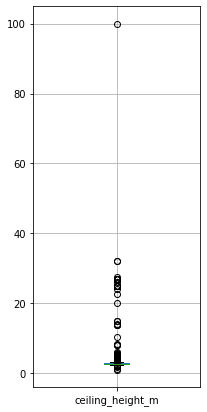

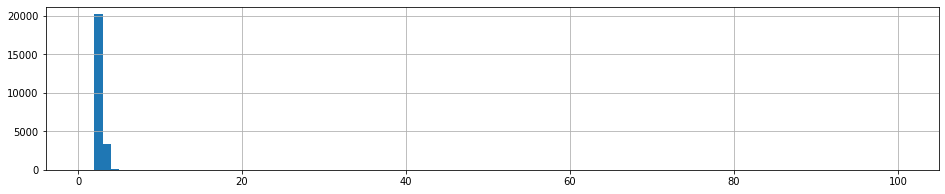

In [134]:
descr_numeric('ceiling_height_m')

In [ ]:
data['ceiling_height_m'].value_counts()

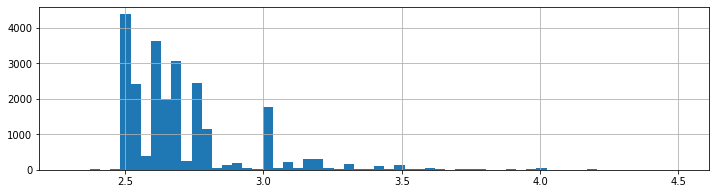

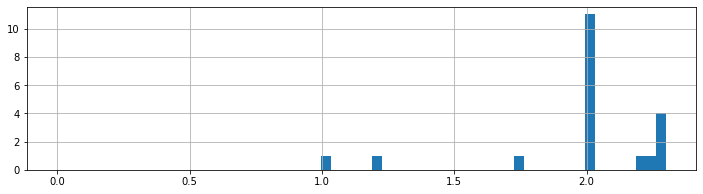

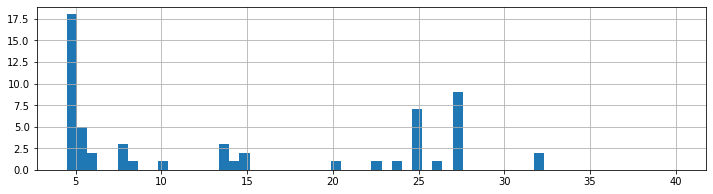

In [135]:
data['ceiling_height_m'].hist(figsize=(12,3), bins=60, range=(2.3, 4.5));
plt.show()
data['ceiling_height_m'].hist(figsize=(12,3), bins=60, range=(0,2.3));
plt.show()
data['ceiling_height_m'].hist(figsize=(12,3), bins=60, range=(4.5,40));

In [ ]:
display(data.query('ceiling_height_m > 19 and ceiling_height_m < 35'))

In [ ]:
# Судя по цене и площади - это обычные квартиры с высотой от 2 до 4 метров. 
# Двузначные значения результат пропуска запятой, разделим эти значения на 10 чтобы исправить значения.

# Список индексов для проверки
index_list = data.query('ceiling_height_m > 19 and ceiling_height_m < 35').index 

Посчитаем аномальные величины:

In [136]:
# Найдем количество аномальных величин высоты потолков
print(len(data.query("ceiling_height_m > 19 and ceiling_height_m < 35")))

# И выведем уникальные значения
print(*data.query("ceiling_height_m > 19 and ceiling_height_m < 35")['ceiling_height_m'].unique())

22
25.0 32.0 27.0 24.0 26.0 20.0 22.6 27.5


22 значения из всего датасета - исчезающе малая величина.<br>
Удалим строки из диапазонов (и скорректируем нижнюю границу до 2.5 м в соответствии с САНПИН):

 - выше 35<br>
 - от 7 до 19<br>
 - ниже 2,5<br>

In [138]:
index_list = data.query('ceiling_height_m > 35 or ceiling_height_m < 2.5 or 7 < ceiling_height_m < 19').index
print(data.loc[index_list, 'ceiling_height_m'])

193        2.47
227        2.34
313       13.85
397       14.85
552        2.00
          ...  
22869    100.00
22960      2.00
23121      2.47
23496      2.45
23498      2.30
Name: ceiling_height_m, Length: 87, dtype: float32


In [139]:
print("Кол-во строк перед удалением:", len(data))
data.drop(index_list, inplace=True, axis=0)
print("Кол-во строк после удаления:", len(data))

data.reset_index(inplace=True, drop=True)
display(data.tail())

Кол-во строк перед удалением: 23699
Кол-во строк после удаления: 23612


,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type,city_center_distance_km,center_km
23607,9,9700000.0,133.809998,2017-03-21,3,3.70,5,73.300003,3,False,...,NaN,72490,1,3,2017,54,10,другой,4.232,4.232
23608,14,3100000.0,59.000000,2018-01-15,3,2.50,5,38.000000,4,False,...,45.0,52542,0,1,2018,64,14,другой,NaN,0.000
23609,18,2500000.0,56.700001,2018-02-11,2,2.65,3,29.700001,1,False,...,NaN,44091,6,2,2018,52,17,первый,NaN,0.000
23610,13,11475000.0,76.750000,2017-03-28,2,3.00,17,43.822689,12,False,...,602.0,149511,1,3,2017,57,30,другой,10.364,10.364
23611,4,1350000.0,32.299999,2017-07-21,1,2.50,5,12.300000,1,False,...,NaN,41795,4,7,2017,38,27,первый,NaN,0.000


In [140]:
data['ceiling_height_m'].describe()

count    23612.000000
mean         2.730460
std          0.757656
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max         32.000000
Name: ceiling_height_m, dtype: float64

In [141]:
data['ceiling_height_m'].value_counts().head(15)

2.50    4324
2.60    3542
2.70    2969
2.55    2087
2.75    2032
2.65    1810
3.00    1736
2.80    1076
3.20     294
3.15     279
3.10     203
2.90     184
2.76     154
2.56     151
3.30     141
Name: ceiling_height_m, dtype: int64

В итоге мы удалили 77 строк с неправдободобными значениями.

**Столбец 'days_exposition'**

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
Name: days_exposition, dtype: float32

count    20442.000000
mean       181.000443
std        219.939468
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

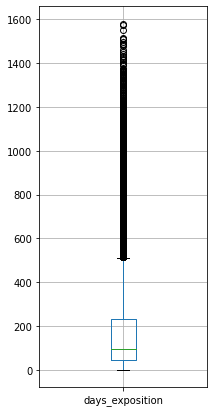

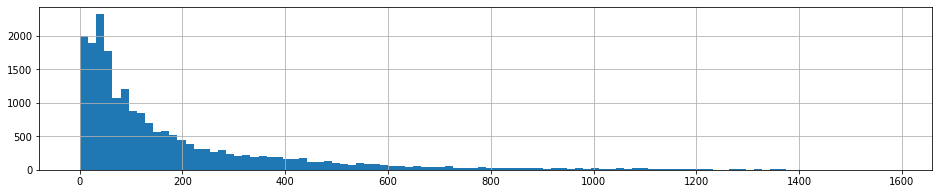

In [142]:
descr_numeric('days_exposition')

Помним, что значение ноль мы присвоили строкам, где не было данных.<br>
Если смотреть на остальные значения, гистограмма выглядит адекватно: чем дольше срок объявления, тем их меньше.

### Посчитайте и добавьте в таблицу новые столбцы

In [194]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area_m2']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area_m2'] / data['total_area_m2'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area_m2'] / data['total_area_m2'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Приведем к километрам расстояние до центра города
data['city_center_distance_km'] = data['city_center_distance_m'] / 1000

display(data.head())
data.info()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,days_exposition,center_km,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type,city_center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,NaN,16.028,120370,3,3,2019,47,23,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,81.0,18.603,82920,1,12,2018,46,27,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,558.0,13.933,92785,3,8,2015,61,14,другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,90.785766,9,False,...,424.0,6.800,408176,4,7,2015,57,17,другой,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,121.0,8.098,100000,1,6,2018,32,41,другой,8.098


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23699 non-null  int64         
 1   last_price                  23699 non-null  float32       
 2   total_area_m2               23699 non-null  float64       
 3   first_day_exposition        23699 non-null  datetime64[ns]
 4   number_of_rooms             23699 non-null  int64         
 5   ceiling_height_m            23699 non-null  float64       
 6   floors_total                23699 non-null  int64         
 7   living_area_m2              23699 non-null  float64       
 8   floor                       23699 non-null  int64         
 9   is_apartment                23699 non-null  bool          
 10  is_studio                   23699 non-null  bool          
 11  is_open_plan                23699 non-null  bool      

Слишком много новых столбцов появилось.<br>
Снова упорядчим их по смыслу.

In [ ]:
data = data[[
 'town_name', 
 'town_name_short',
 'town_category',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'area_ratio',
 'kitchen_ratio',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'floor_type',
 'floors_total',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'sm_price',
 'first_day_exposition',
 'weekday',
 'month',
 'year',
 'days_exposition',
 'city_center_distance_m',
 'city_center_distance_km', 
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [ ]:
# Для разнообразия посмотрим рандомную выборку
data.sample(10)

### Проведите исследовательский анализ данных

Изучим параметры - площадь, цена, число комнат, высота потолков и т.д. <br>
Построим гистограммы для каждого параметра, заодно посчитаем медианные значения.

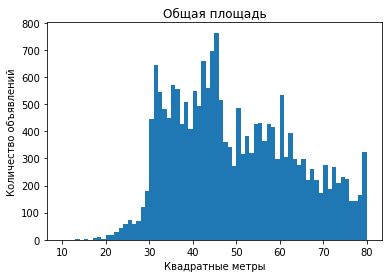

Медианное значение по всем объявлениям: 52.0


In [125]:
# Начнем с общей площади
plt.hist(data['total_area_m2'], bins=70, range=(10,80))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['total_area_m2'].sort_values(ascending=False).median())

Самые популярные объявления с площадями с площадями 30-45 кв.м (1 и 2-х комнатные). <br>
Далее 2-х и 3-х комнатные с площадью до 75 кв.м. <br>
Квартиры до 30 и более 75 кв.м. встречаются заметно реже, значение медианы подтверждает это.

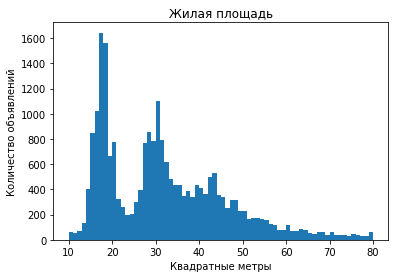

Медианное значение по всем объявлениям: 30.0


In [124]:
# Жилая площадь
plt.hist(data['living_area_m2'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['living_area_m2'].sort_values(ascending=False).median())

Самые распространённые варианты с жилой площадью от 15 до 50 метров.<br>
После 80 метров встречаются единичные случаи.<br>
Пиковые значения от 15 до 20 - студии, примерно с 28 кв.м. появляются 1-комнатные и т.д.

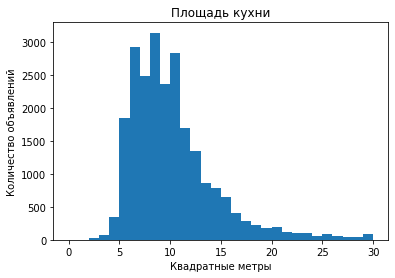

Медианное значение по всем объявлениям: 9.0


In [123]:
# Площадь кухни
plt.hist(data['kitchen_area_m2'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['kitchen_area_m2'].sort_values(ascending=False).median())

Самые распространённые кухни - от 5 до 15 метров.<br>
Больше 20 метров - большая редкость.

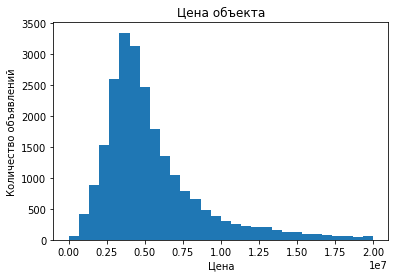

Медианное значение по всем объявлениям: 4650000.0


In [122]:
# Цена объекта
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['last_price'].sort_values(ascending=False).median())

Наиболее часто встречающаяся стоимость квартир - 5 миллионов. <br>
Варианты больше 20 миллионов практически не встречаются.

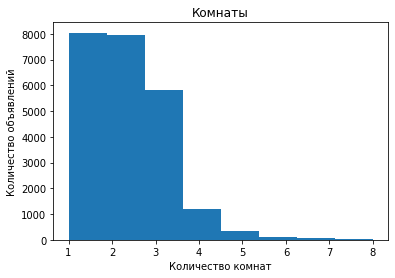

Медианное значение по всем объявлениям: 2.0


In [121]:
# Количество комнат
plt.hist(data['number_of_rooms'], bins=8, range=(1,8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['number_of_rooms'].sort_values(ascending=False).median())

В основном в квартирах 1, 2 или 3 (реже - 4) комнаты. <br>
Варианты c более 5 комнатами больше похожи на отдельные дома.<br>

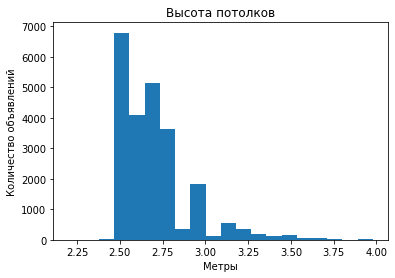

Медианное значение по всем объявлениям: 2.65


In [120]:
# Высота потолков
plt.hist(data.query('(ceiling_height_m > 2) & (ceiling_height_m < 4)')['ceiling_height_m'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['ceiling_height_m'].sort_values(ascending=False).median())

Всё стандартно: 2.5 - 2.75 - самые популярные значения, медиана с нами согласна.<br>
Могут быть и чуть более просторные варианты.

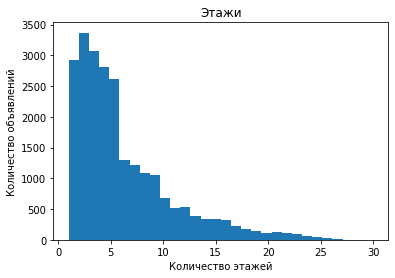

Медианное значение по всем объявлениям: 4.0


In [119]:
# Этаж квартиры
plt.hist(data['floor'], bins=30, range=(1,30))
plt.title('Этажи')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['floor'].sort_values(ascending=False).median())

Популярнее всего первые 5 этажей.<br>
Вообще, чем ниже этаж, тем больше объявлений.

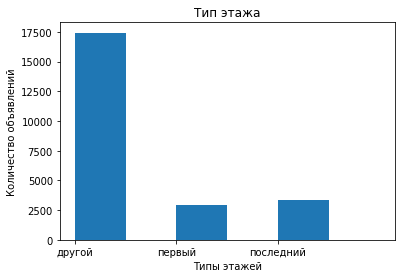

In [118]:
# Этаж квартиры
plt.hist(data['floor_type'], bins=6, range=(0,3))
plt.title('Тип этажа')
plt.xlabel('Типы этажей')
plt.ylabel('Количество объявлений')
plt.show()

Основная масса - этажи между первым и последним.<br>
Объявлений с первым и последним этажами примерно поровну, и не так много.<br>
Но если учесть, что самые популярные объявления с 1 по 5 этаж, получается, что популярнее всего пятиэтажки.

Проверим это, изучив столбец с общим количеством этажей.

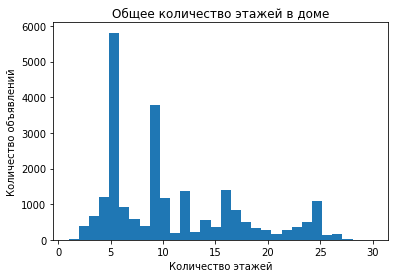

Медианное значение по всем объявлениям: 9.0


In [117]:
# Общее количество этажей в доме
plt.hist(data['floors_total'], bins=30, range=(1,30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['floors_total'].sort_values(ascending=False).median())

Так и есть: больше всего пятиэтажек, затем по популярности 9-этажные дома.<br>
Остальных значительно меньше: высокие новостройки или устаревшие дома до 9 этажей.

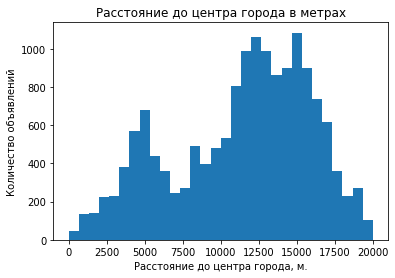

Медианное значение по всем объявлениям: 13098.5


In [116]:
# Расстояние до центра города в метрах
plt.hist(data['city_center_distance_m'], bins=30, range=(0,20000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['city_center_distance_m'].sort_values(ascending=False).median())

Выделяются 3 пика: 5 км, 12.5 км и 16 км.<br>
Дальних расстояний больше, это логично: на периферии города жилой фонд объёмнее, значит и объявлений тоже больше.<br>
Ближе к центру квартиры тоже продаются, но объявлений меньше, и количество их ограничено географически (строить новые дома в центре просто негде).

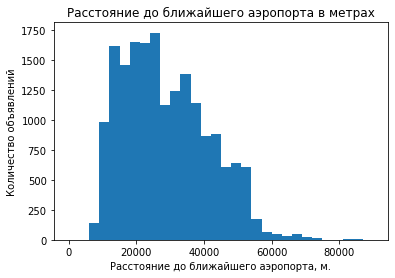

Медианное значение по всем объявлениям: 26726.0


In [115]:
# Расстояние до центра города в метрах
plt.hist(data['nearest_airport_distance_m'], bins=30, range=(0,90000))
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('Расстояние до ближайшего аэропорта, м.')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['nearest_airport_distance_m'].sort_values(ascending=False).median())

Основная масса объявлений - от 15 до 45 км.<br>
Есть и редкие объявления от 50 и более км, но в этом нет ничего необычного: Ленинградская область большая, а аэропортов - единицы.

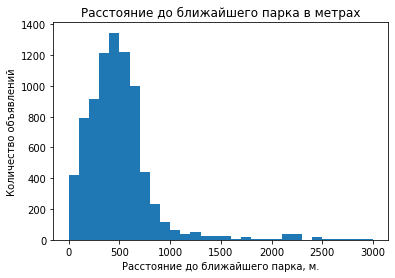

Медианное значение по всем объявлениям: 455.0


In [114]:
# Расстояние до ближайшего парка в метрах
plt.hist(data['nearest_park_distance_m'], bins=30, range=(0,3000))
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('Расстояние до ближайшего парка, м.')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['nearest_park_distance_m'].sort_values(ascending=False).median())

У большинства объявлений парки находятся рядом - на расстоянии 500 метров.<br>
Это сочетается с данными о расстоянии от центра: на периферии города парков больше, чем в плотной исторической застройке центра. 

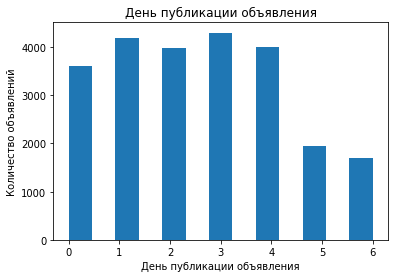

Медианное значение по всем объявлениям: 3.0


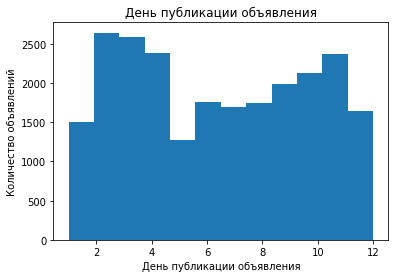

Медианное значение по всем объявлениям: 6.0


In [113]:
# День публикации объявления
plt.hist(data['weekday'], bins=13, range=(0,6))
plt.title('День публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['weekday'].sort_values(ascending=False).median())

# Месяц публикации объявления
plt.hist(data['month'], bins=12, range=(1,12))
plt.title('День публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()
print('Медианное значение по всем объявлениям:', data['month'].sort_values(ascending=False).median())

Дни недели: объявления чаще всего публикуются со вторника по четверг, с пятницы по понедельник - естественное снижение активности в связи с выходными днями. <br>

Месяцы: пики с февраля по апрель и с сентября по ноябрь.<br>
В мае (перед началом лета), а также в декабре-январе (перед новым годом) - объяснимое снижение активности.

**Теперь изучим срок продажи квартиры - столбец 'days_exposition'**

Медиана срока продажи: 95 

Средний срок продажи: 181 



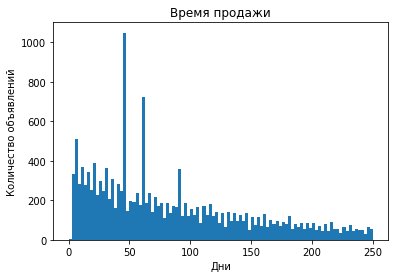

count    20518.000000
mean       180.888641
std        219.727982
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [112]:
# Исключим пустые значения (ранее мы отметили их как 0)
print('Медиана срока продажи:', round(data.query('days_exposition != 0')['days_exposition'].median()),'\n')
print('Средний срок продажи:', round(data.query('days_exposition != 0')['days_exposition'].mean()),'\n')

# Гистограма времени продажи
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()

# Изучаем значения срока продажи
data.query('days_exposition != 0')['days_exposition'].describe()

Основная масса квартир находит покупателей за 4 - 5 месяцев (до 150 дней).<br>

Медианное время продажи - 95 дней, среднее время продажи - 181 день.<br>

Выделяются два явных пика: около 45 и 60 дней (полтора и два месяца).<br>

Разумеется, есть и крайние величины: квартиры, проданные за несколько дней, или более полугода.<br>

Быстрой продажей можно назвать срок в 45 дней и меньше.<br>
Долгой продажей - 230 дней (7,5 месяцев) и дольше.

**Определение факторов, влияющих на стоимость квартиры**

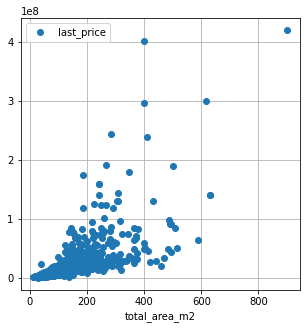

Корреляция цены и общей площади: 

               last_price  total_area_m2
last_price       1.000000       0.738972
total_area_m2    0.738972       1.000000 



In [111]:
# Зависимость цены от общей площади
(
    data.pivot_table(index='total_area_m2', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area_m2', 'last_price']).corr(),'\n')

Цена в значительной степени зависит от общей площади квартиры.<br>
Наблюдаем сильную положительную корреляцию

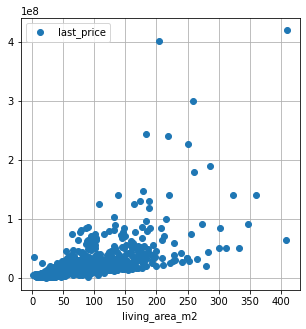

Корреляция цены и жилой площади: 

                last_price  living_area_m2
last_price        1.000000        0.626465
living_area_m2    0.626465        1.000000 



In [110]:
# Зависимость цены от жилой площади
(
    data.pivot_table(index='living_area_m2', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area_m2', 'last_price']).corr(),'\n')

От жилой площади зависимость немного меньше, чем от общей.

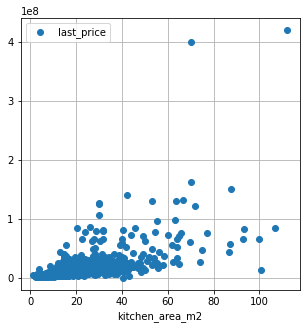

Корреляция цены и площади кухни: 

                 kitchen_area_m2  last_price
kitchen_area_m2          1.00000     0.30777
last_price               0.30777     1.00000 



In [109]:
# Зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area_m2', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area_m2', 'last_price']).corr(),'\n')

Зависимость от площади кухни еще меньше, чем от жилой или общей площадей.

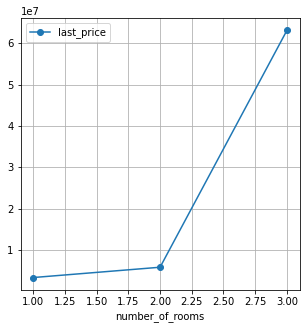

Корреляция цены и числа комнат: 

                 last_price  number_of_rooms
last_price          1.00000          0.55763
number_of_rooms     0.55763          1.00000 



In [108]:
# Зависимость цены от числа комнат
(
    data.query('number_of_rooms').pivot_table(index='number_of_rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('number_of_rooms').pivot_table(index='floor', values=['number_of_rooms', 'last_price']).corr(),'\n')

Традиционно чем больше комнат, тем больше цена.

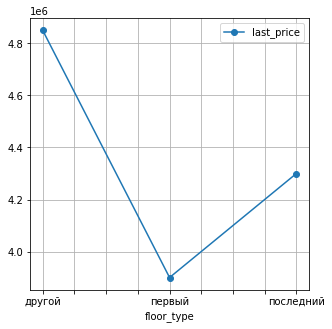

In [107]:
# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Также, традиционно квартиры на 1-м этаже самые дешевые, последний этаж немного дороже. <br>
У квартир на остальных этажах стоимость больше.

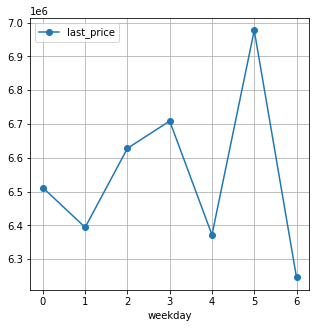

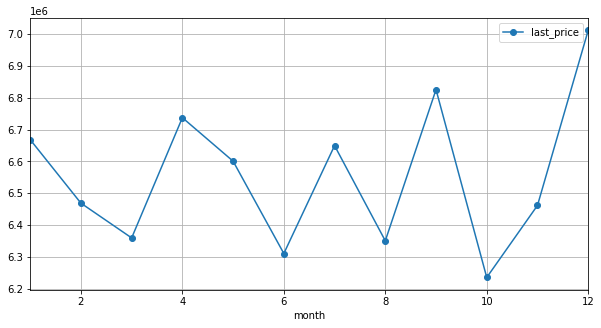

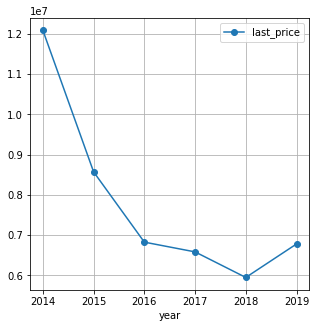

In [106]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

День недели: цена от него практически не зависит, да и может ли? Вот количество размещений - да, но цена определяется другими факторами.<br>

Месяц: просматривается цикличность. Например, в июне цены были низкие, в июле выросли, а в августе снова снизились, и так в течение всего года (с шагом в месяц-два).<br>

Год: квартиры очень сильно подешевели в 2016-2018 годах, видимо, следствие кризиса 2014-2015 годов. К 2019 экономика стала восстанавливаться, цены подросли.<br>

In [200]:
# Строим таблицу корелляции основных параметров:
data[['last_price', 'total_area_m2', 'number_of_rooms', 'city_center_distance_m']].corr()

,last_price,total_area_m2,number_of_rooms,city_center_distance_m
last_price,1.000000,0.653675,0.363343,-0.206747
total_area_m2,0.653675,1.000000,0.758344,-0.231446
number_of_rooms,0.363343,0.758344,1.000000,-0.184864
city_center_distance_m,-0.206747,-0.231446,-0.184864,1.000000


Видим довольно большую зависимость количества комнат и общей площади квартиры - конечно, эти параметры чаще всего связаны напрямую. Как правило, чем больше комнат, тем дороже квартира.<br>

Зависимость общей площади и цены тоже видна, но слабее.<br>

Отрицательная корреляция цены и расстояния от центра города говорит нам о разнонаправленности этих величин: при снижении расстояния до центра цена растет, и наоборот. 

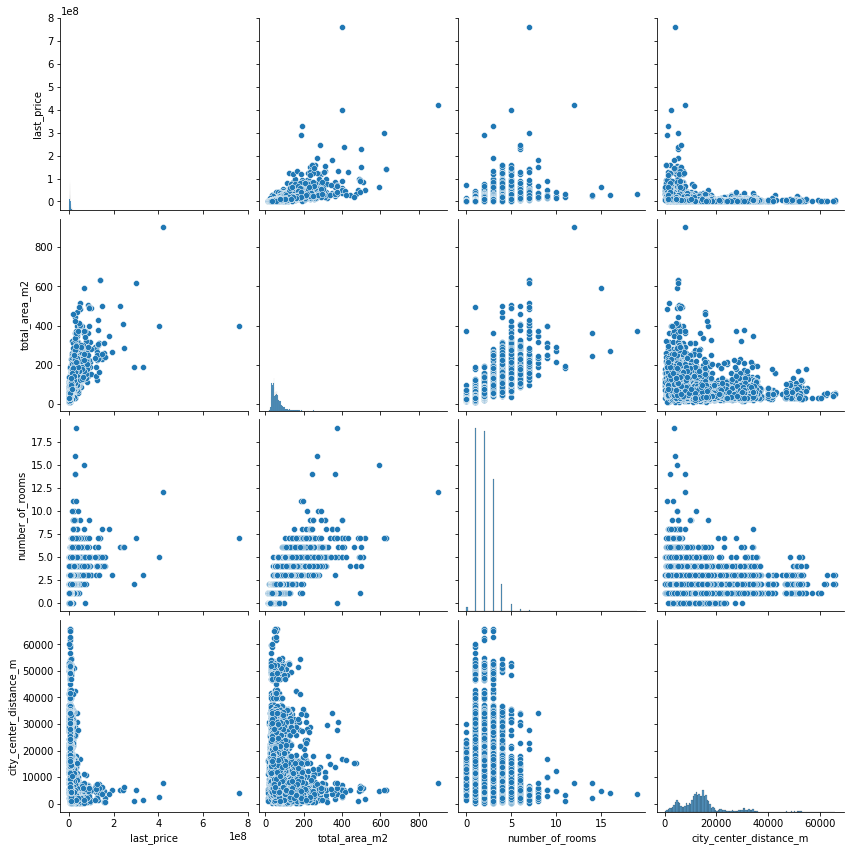

In [221]:
# Визуализируем матрицу:
sns.pairplot(data, vars=['last_price', 'total_area_m2', 'number_of_rooms', 'city_center_distance_m'],
                height=3)

In [104]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
# Ввеём новые переменные
city_top_ten = data['town_name'].value_counts().head(10)

city_sm_price = data.query('town_name in (@city_top_ten.index)').pivot_table(values='sm_price', index='town_name')

city_sm_price = city_sm_price.astype(int)

city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
town_name,
Санкт-Петербург,114848
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85751
посёлок Шушары,78676
Колпино,75424
Гатчина,68745
Всеволожск,68654


Наибольшая средняя стоимость квадратного метра в столице области Санкт-Петербурге и ближайшем пригороде Пушкине - это полностью объяснимо. <br>

Из топ-10 наименьшая стоимость в Гатчине и Всеволожске и Выборге, от которых Санкт-Петербург слишком далеко.

**Средняя цена километра в Санкт-Петербурге**

Text(0, 0.5, 'Цена')

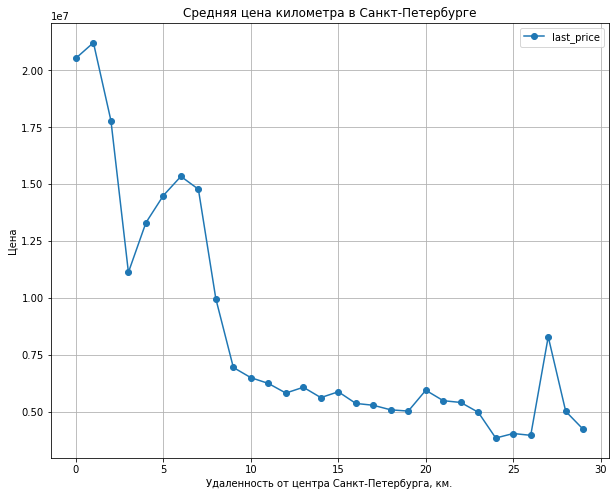

In [236]:
# Добавляем переменную с расстоянием до центра в км, выбираем Санкт-Петербург, округляем до целого
spb = data.loc[data['town_name']=='Санкт-Петербург',['last_price', 'city_center_distance_m']].reset_index(drop=True)
spb['center_km'] = round(spb['city_center_distance_m']/1000).fillna(value=0).astype(int)

# Собираем сводную таблицу и строим график, где указана средняя стоимость для каждого км
price_km_spb = spb.pivot_table(index='center_km', values='last_price', aggfunc='mean')
price_km_spb.plot(style='o-', grid=True, figsize=(10,8))

pl.title("Средняя цена километра в Санкт-Петербурге")
pl.xlabel("Удаленность от центра Санкт-Петербурга, км.")
pl.ylabel("Цена")

Центральная зона - расстояние до 7 км. <br>
Дальше 7 км средняя цена на квартиры резко снижается.

### Общий вывод

Перед нами была поставлена задача выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.<br>

Проведя предобработку и добавив необходимые для анализа новые категории данных, мы получили интересные результаты.<br>

Главные наблюдения:

**Срок продажи квартиры**<br>
Основная масса квартир находит покупателей за 4 - 5 месяцев (до 150 дней).<br>
Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

**Факторы, влияющие на стоимость**<br>
На стоимость больше влияет площадь квартиры, чем число комнат.<br>
Первый этаж значительно дешевле остальных вариантов. <br>
Cтоимость квартиры на последнем этаже ниже, чем на остальных (кроме первого).

**Стоимость квадратного метра в топ-10 населённых пунктов**<br>
Дороже всего квадратный метр в Санкт-Петербурге - 114848.<br>
Дешевле всего квадратный метр в Выборге - 58141.

**Расстояние от центра в Санкт-Петербурге**<br>
Центральная зона, в которой цены наиболее высоки - расстояние до 7 км. <br>
Дальше 7 км средняя цена на квартиры резко снижается.